In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("employee_salary.csv")

In [4]:
data["experience_level"]=data["experience_level"].replace({"EN":"Entry Level","MI":"Mid Level","EX":"Expert Level","SE":"Senior Level"},)
data["employment_type"]=data["employment_type"].replace({"PT":"Part Time","FT":"Full Time","CT":"Contractual","FL":"Freelance"})
data["company_size"]=data["company_size"].replace({"M":"Medium","L":"Large","S":"Small"})
data["remote_ratio"]=data["remote_ratio"].replace({100:"Fully Remote",0:"Non Remote Work",50:"Partially Remote"})
data.rename(columns={"work_year": "work year","experience_level": "experience level","employment_type":"employment type","job_title":"job title","salary_currency":"salary currency","salary_in_usd":"salary in usd","employee_residence":"employee residence","remote_ratio": "remote ratio","company_location":"company location","company_size":"company size"}, inplace = True)

In [5]:
print(data.describe(include="object"))

       experience level employment type       job title salary currency  \
count               500             500             500             500   
unique                4               3              57               6   
top        Senior Level       Full Time  Data Scientist             USD   
freq                310             497             102             473   

       employee residence     remote ratio company location company size  
count                 500              500              500          500  
unique                 19                3               15            3  
top                    US  Non Remote Work               US       Medium  
freq                  450              347              453          464  


In [6]:
print(data.describe())

         work year        salary  salary in usd
count   500.000000  5.000000e+02     500.000000
mean   2023.124000  1.538536e+05  149465.774000
std       0.705421  1.205877e+05   66206.133779
min    2020.000000  1.700000e+04   17000.000000
25%    2023.000000  1.028750e+05  102915.750000
50%    2023.000000  1.422000e+05  142200.000000
75%    2024.000000  1.882500e+05  187250.000000
max    2024.000000  2.400000e+06  438000.000000


In [7]:
# first 5 rows of csv file 
data.head()

,work year,experience level,employment type,job title,salary,salary currency,salary in usd,employee residence,remote ratio,company location,company size
0,2024,Entry Level,Full Time,Research Analyst,300000,USD,300000,US,Non Remote Work,US,Medium
1,2024,Senior Level,Full Time,Research Scientist,159300,USD,159300,US,Non Remote Work,US,Medium
2,2023,Senior Level,Full Time,Machine Learning Engineer,250500,USD,250500,US,Non Remote Work,US,Medium
3,2023,Senior Level,Full Time,Data Scientist,190000,USD,190000,US,Fully Remote,US,Medium
4,2024,Mid Level,Full Time,Robotics Software Engineer,207000,USD,207000,US,Non Remote Work,US,Medium


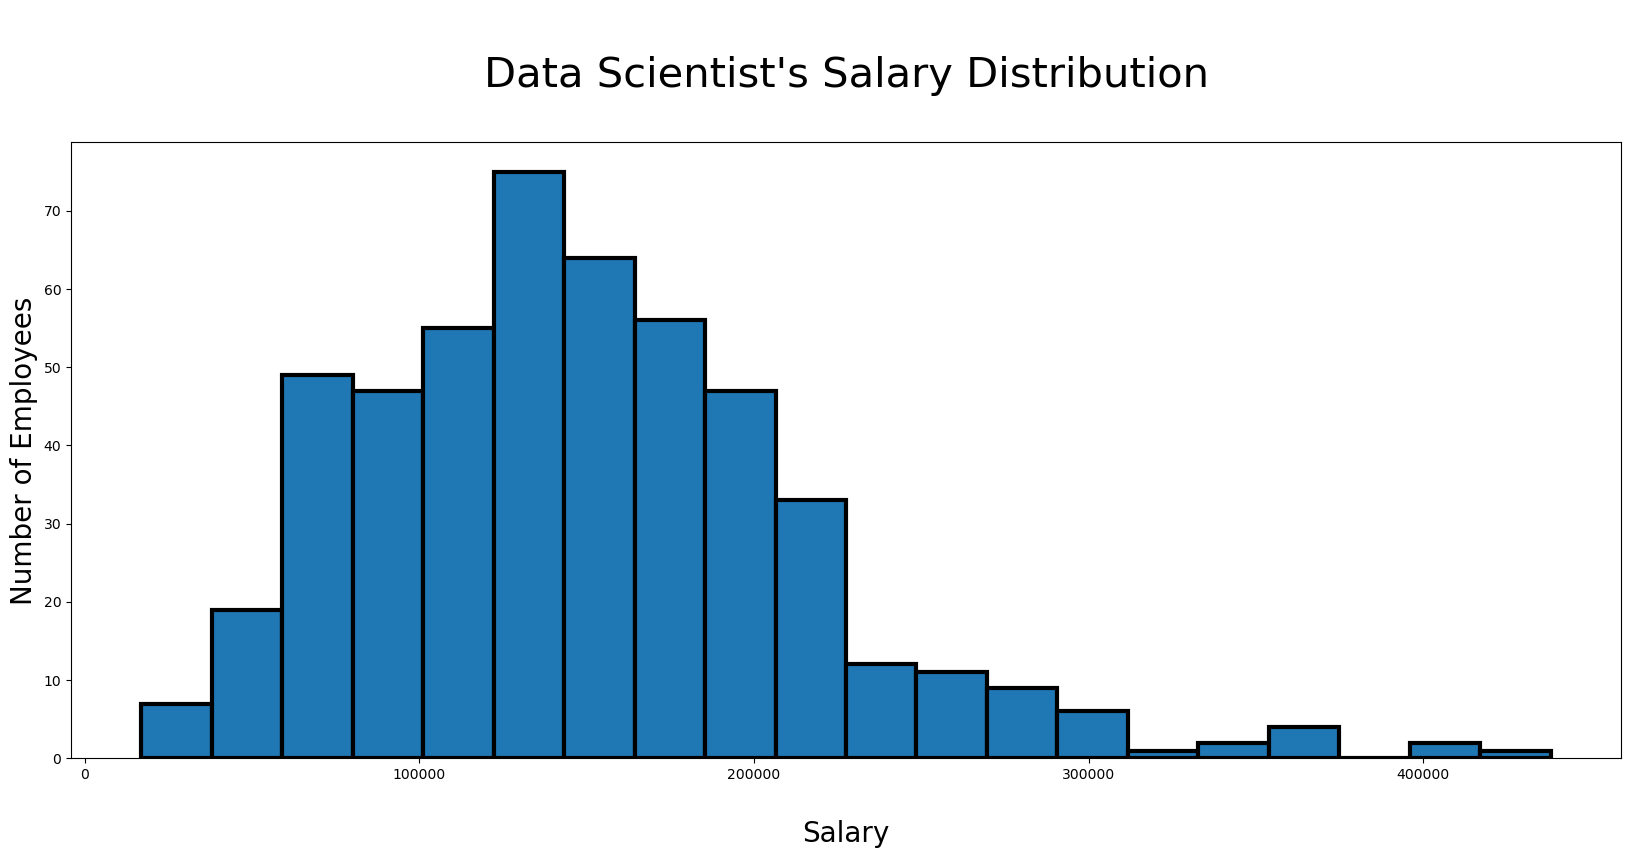

In [8]:
plt.figure(figsize=(20, 8))
plt.hist(data["salary in usd"], bins="auto", alpha=1, edgecolor="black", linewidth=3)

plt.title("\nData Scientist's Salary Distribution\n", fontsize=30)
plt.ylabel("Number of Employees", fontsize=20)
plt.xlabel("\nSalary", fontsize=20)

plt.show()

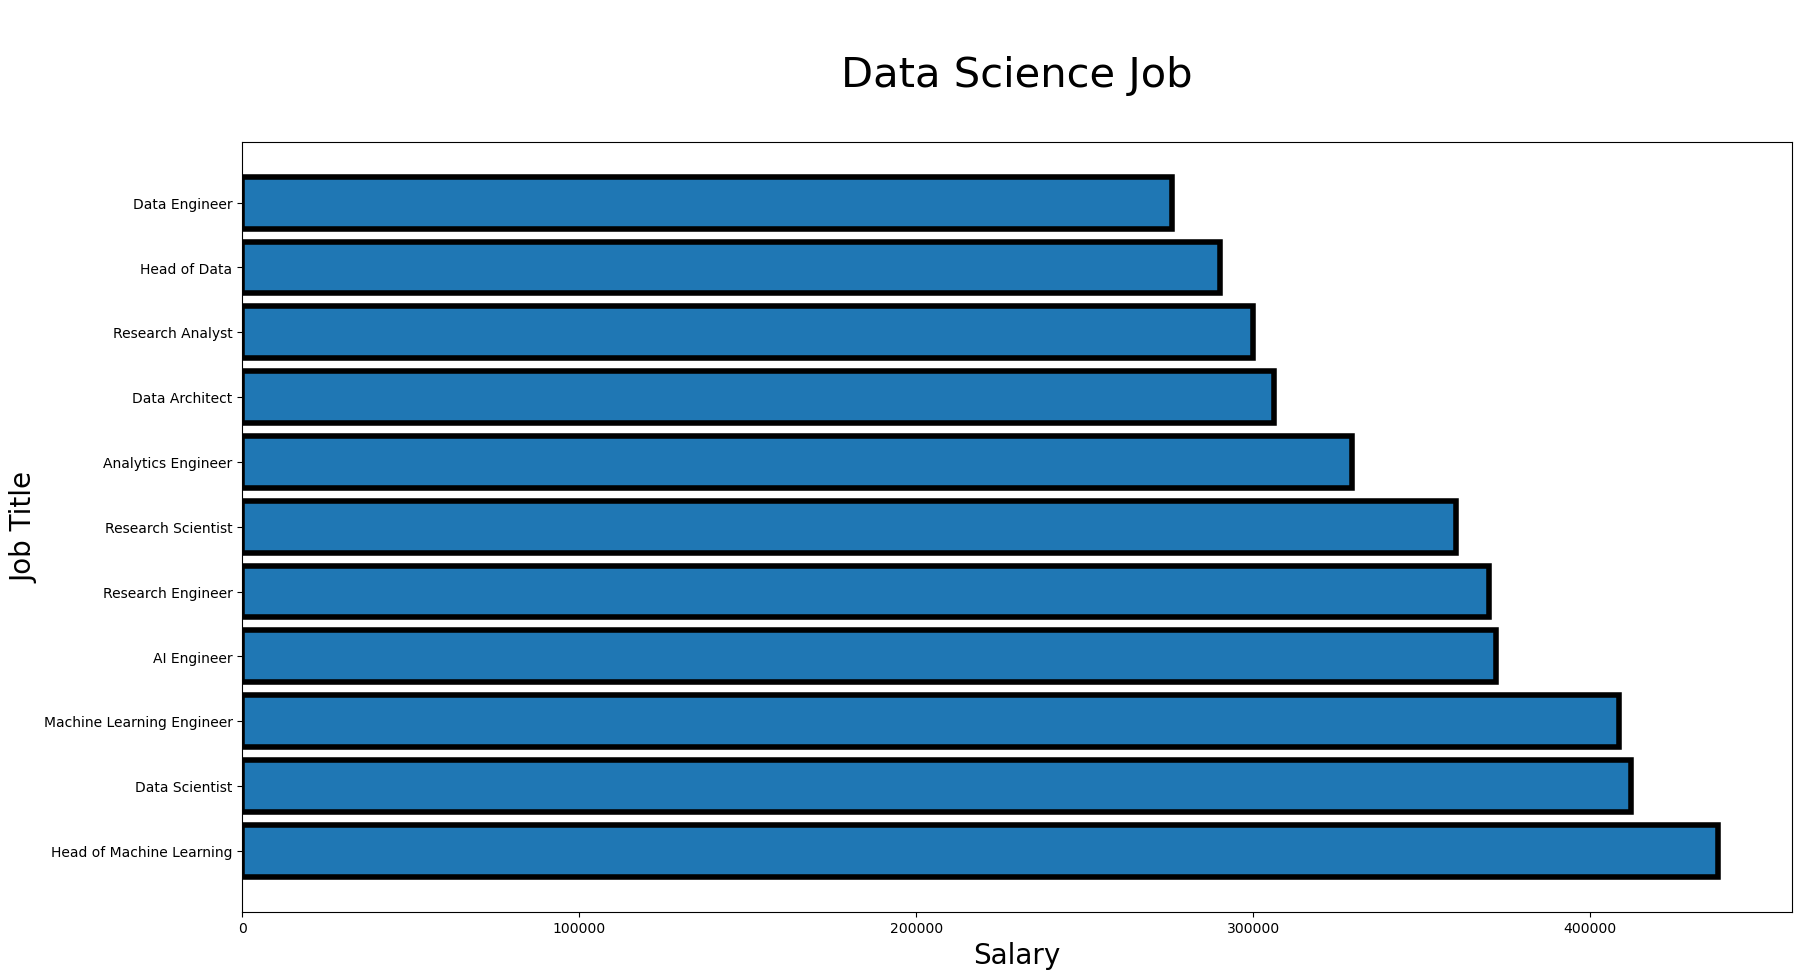

In [9]:
data_high = data.groupby("job title")["salary in usd"].max().sort_values(ascending=False)[:11]
plt.figure(figsize=(20, 10))
plt.barh(data_high.index, data_high.values, edgecolor="black", linewidth=4)

plt.title("\nData Science Job\n", fontsize=30)
plt.xlabel("Salary", fontsize=20)
plt.ylabel("Job Title", fontsize=20)

plt.show()

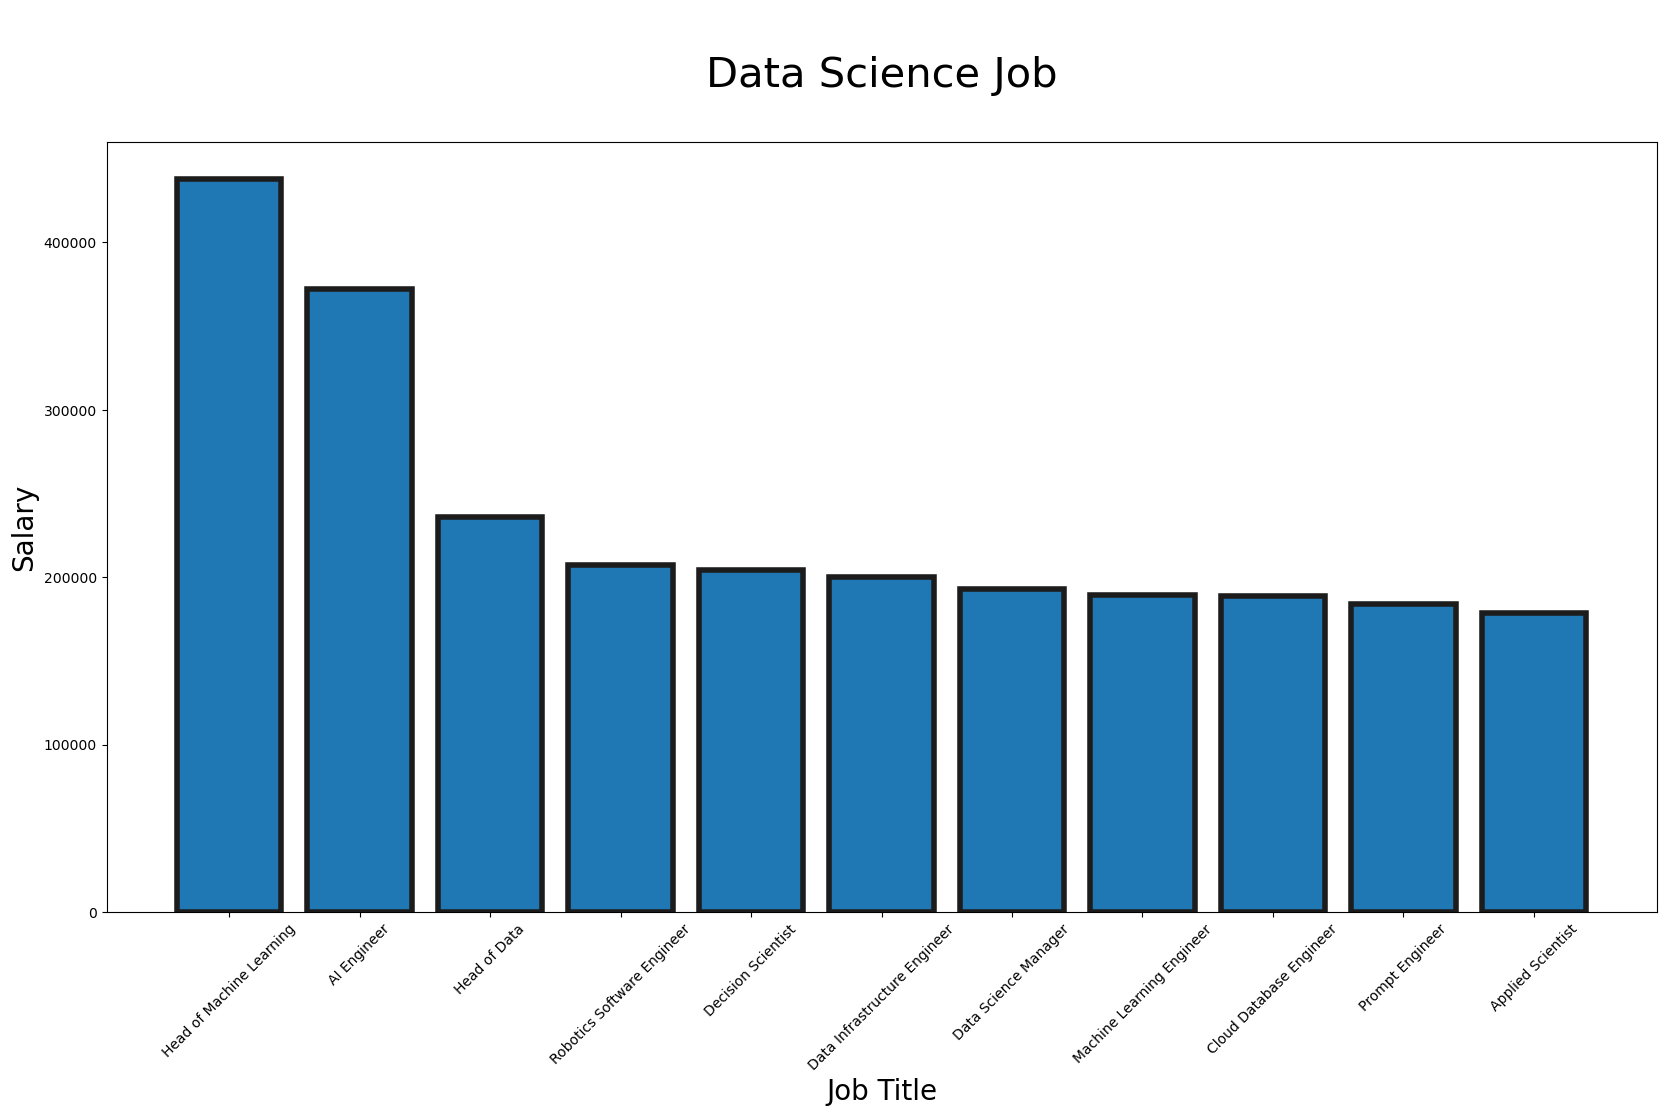

In [10]:
data_avg = data.groupby("job title")["salary in usd"].mean().sort_values(ascending=False)[:11]

plt.figure(figsize=(20, 10))
p = plt.bar(data_avg.index, data_avg.values, edgecolor="#1c1c1c", linewidth=4)

plt.title("\nData Science Job\n", fontsize=30)
plt.xlabel("Job Title", fontsize=20)
plt.ylabel("Salary", fontsize=20)
plt.xticks(rotation=45)

plt.show()


   work year  salary in usd
0       2020  142177.166667
1       2021   84001.000000
2       2022  140899.591837
3       2023  150184.944079
4       2024  153164.357664


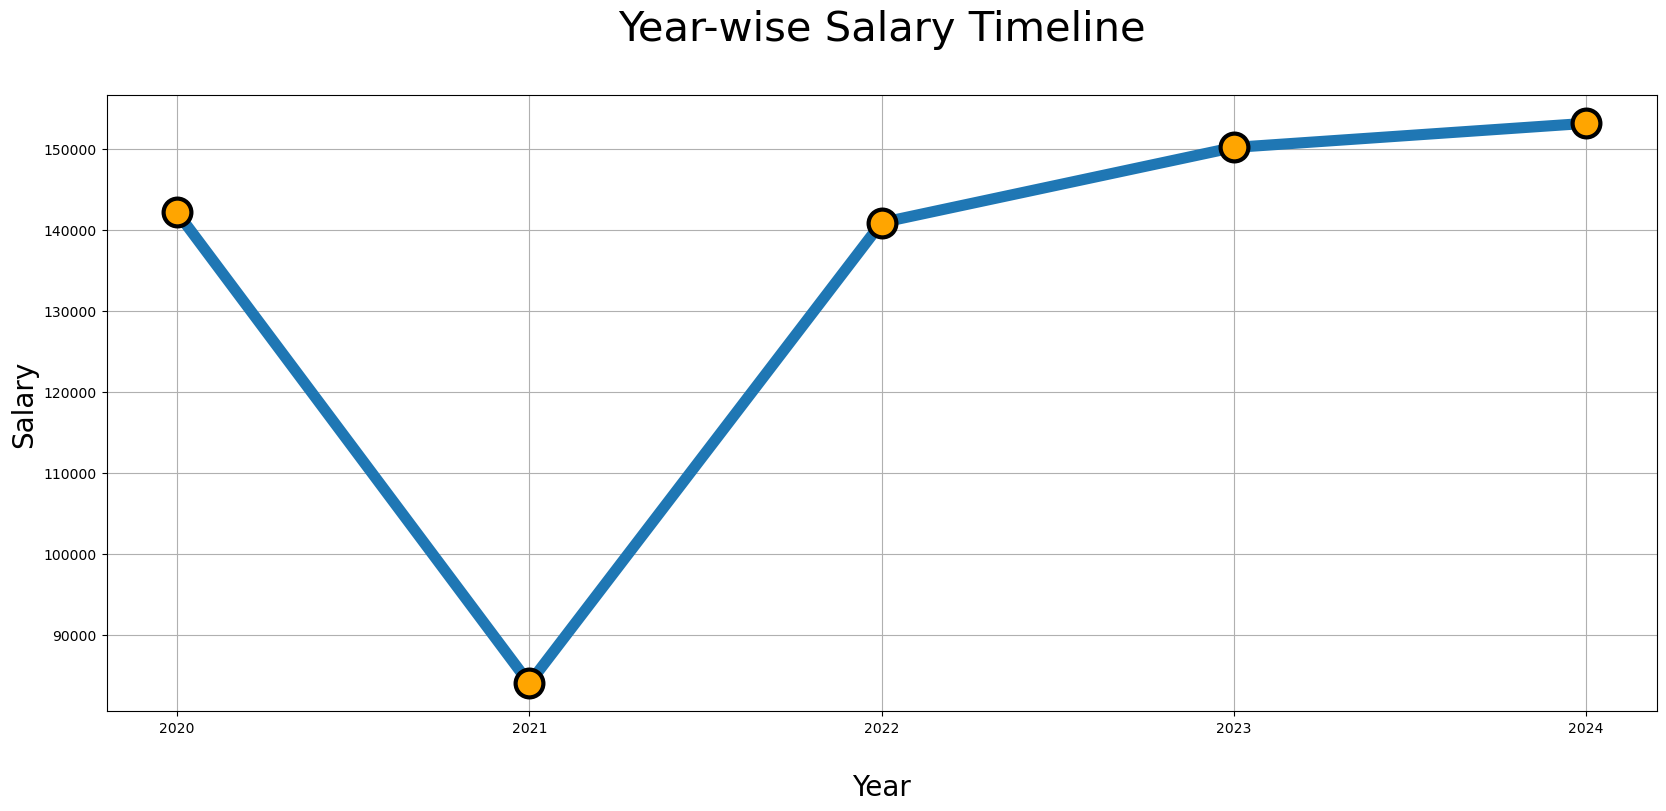

In [11]:
data_timeline = data.groupby("work year")["salary in usd"].mean().reset_index()
print(data_timeline)
data_timeline["work year"] = data_timeline["work year"].astype(str)  # Convert to string for plotting

plt.figure(figsize=(20, 8))

# Line plot
plt.plot(data_timeline["work year"], data_timeline["salary in usd"], marker="o", linewidth=8, markersize=20, markerfacecolor="orange", markeredgecolor="black", markeredgewidth=3)

plt.title("Year-wise Salary Timeline\n", fontsize=30)
plt.xlabel("\nYear", fontsize=20)
plt.ylabel("Salary", fontsize=20)



plt.grid(True)  # Add gridlines

plt.show()

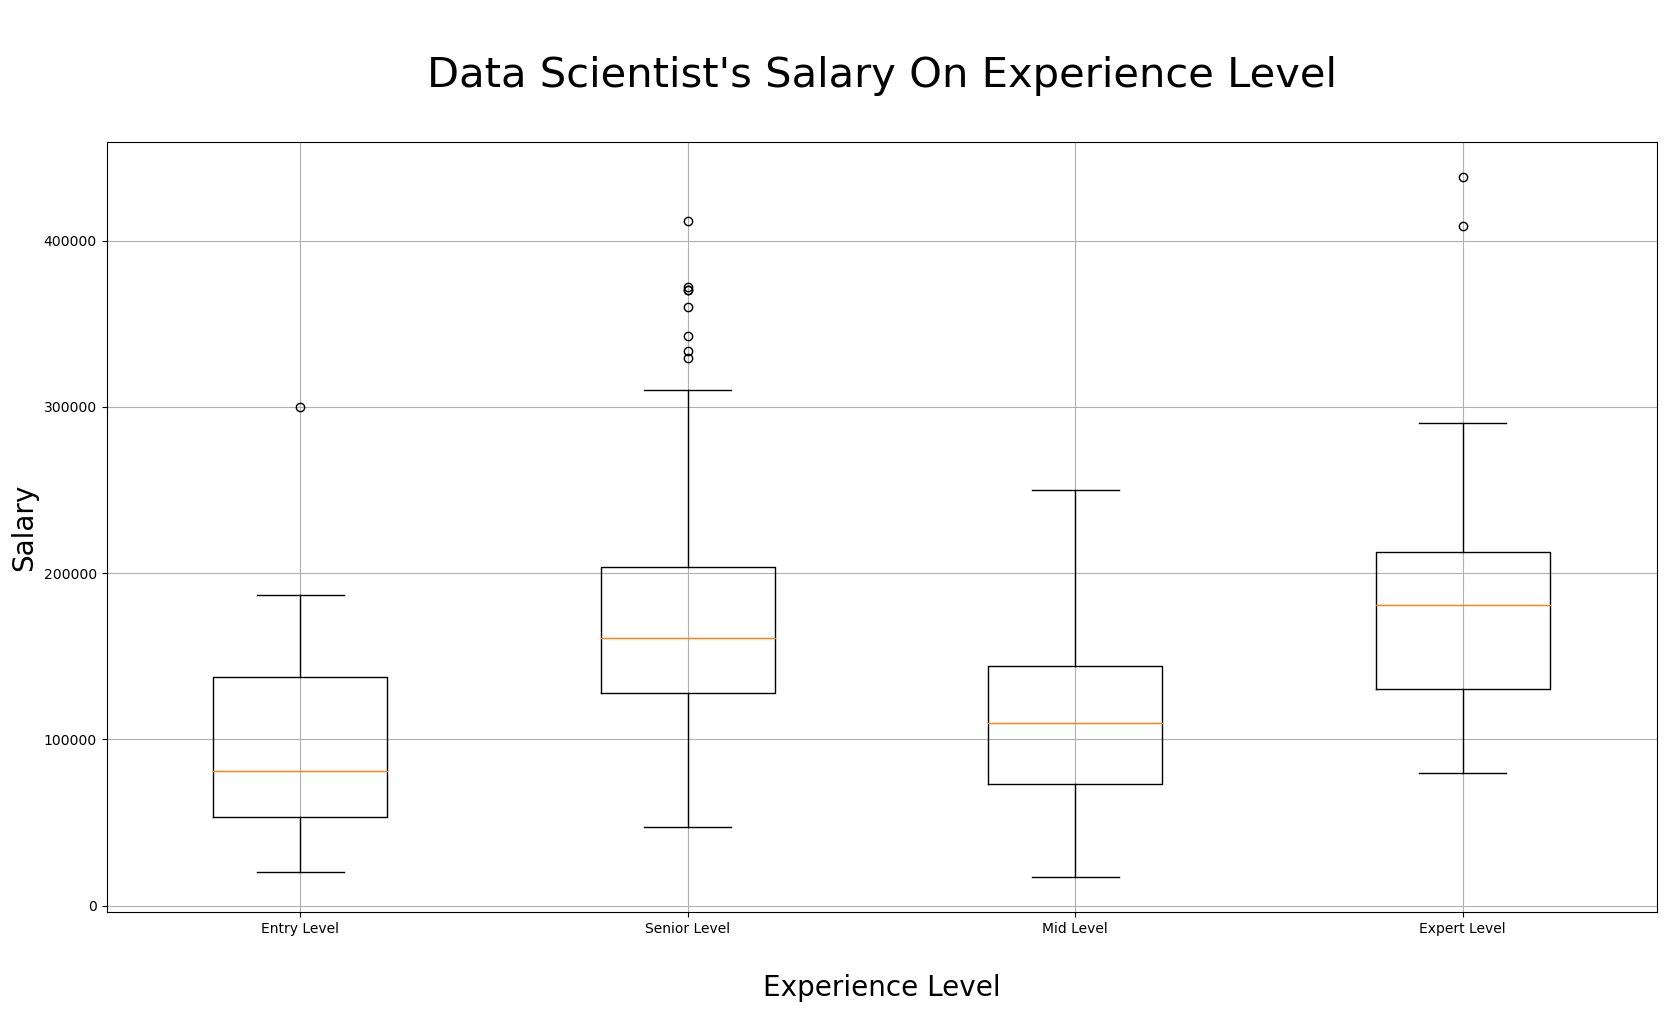

In [11]:
plt.figure(figsize=(20, 10))

# Box plot
plt.boxplot([data[data["experience level"]==level]["salary in usd"] for level in data["experience level"].unique()], 
                positions=range(len(data["experience level"].unique())))

plt.title("\nData Scientist's Salary On Experience Level\n", fontsize=30)
plt.xlabel("\nExperience Level", fontsize=20)
plt.ylabel("Salary", fontsize=20)

# Set x-axis ticks and labels
plt.xticks(range(len(data["experience level"].unique())), data["experience level"].unique())

plt.grid(True)  # Add gridlines

plt.show()